# MP305 Activity Networks Michael Tuite

# Overview
### A project consists of $N$ activities $A,B,C,....$ each taking some time to complete which obey precedence relations e.g. $C$ takes place after $A$ etc.

### In this Python file activities are described by a set `Act` e.g.  `Act=set(["A","B","C"])` where `"A"`, `"B"` and `"C"` are just string names for activities such as `"First Job"`, `"Tea Break"`, ...etc

### The time taken to complete the activities is described by a Python dictionary called `Time` e.g. `Time["First Job"]=3`

### Precedence relations are described by a Python dictionary called `Prec` with entries giving the set of preceeding activities e.g.  `Prec["First Job"]=set()` (where `set()` is the empty set) if no preceeding activity exists or `Prec["Tea Break"]={"First Job"}` if `"Tea Break"` must take place after the first job has been completed.


#  The `Activity` Python function
### This takes the given activities set `Act`, the dictionary `Time` and the precedence relations dictionary `Prec` and relabels the activities according to the Fulkerson algorithm from 0 to $N+1$ where the START has label $0$ and the FINISH has label $N+1$.  

### A list `G` of arcs `(i,j)` describing the Activity Network $G$ with vertices $(i,j)$  labelled by $0,1,2,.. N+1$ is produced which describes the network. A list `T` giving the completion times for the activities is also produced.

### The Activity Network is drawn but note that it may not always shown in its simplest form.

In [1]:
!pip install networkx
%matplotlib inline
import networkx as nx 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, Math, Latex

In [2]:
def Activity (Act, Time, Prec):
    global G,T,Alist,FinInd,LabelAi
    FinInd = len(Act) + 1 
    T=[0 for i in range(FinInd+1)]
    LabelAi=dict();LabeliA=dict()
    LabelAi[0] = "Start"; LabeliA["Start"] = 0
    LabelAi[FinInd] = "Finish"; LabeliA["Finish"] = FinInd
    NewP=dict()
    for AA in Act:
        NewP[AA] = Prec[AA]
    Acurrent = Act
    iA=0
    Alist = [[0]]
    while (Acurrent != set()):
        NewA = set()
        for Ai in Acurrent:
            if NewP[Ai] == set():
                NewA = NewA | set([Ai])
        NewAlist = []
        inew=1
        for An in NewA:
            LabelAi[inew + iA] = An;  LabeliA[An] = inew + iA
            NewAlist = NewAlist + [inew + iA]
            T[inew + iA] = Time[An]
            inew=inew+1
        Alist = Alist + [NewAlist] 
        iA = iA + len(NewA)
        Acurrent = Acurrent - NewA
        for Ai in Act:
            NewP[Ai] = NewP[Ai] - NewA
    Alist = Alist + [[FinInd]]
    G = set()
    FinNode = set([i for i in range(1,FinInd)])
    for AA in Act:
        iAA = LabeliA[AA]
        if Prec[AA] == set():
            G = G | set([(0,iAA)])
        else:
            for AB in Prec[AA]:
                iAB = LabeliA[AB]
                FinNode = FinNode - set([iAB])
                G = G | set([(iAB,iAA)])
    for iA in FinNode:
        G = G | set([(iA,FinInd)])
    print("The Activities have been relabeled with completion times:")
    for i in range(0, FinInd + 1):
        print("Activity ", LabelAi[i], " is activity ", i, " with completion time ", T[i])
    print("")
    print("The Activity Network is decribed by: ", G)
    plt.figure(figsize=(6, 6))
    G_Graph=nx.DiGraph()
    for arc in G:
        i,j=arc
        G_Graph.add_edge(i,j)
    Gh=20; Gw=200
    Gpos={0:(0,Gh/2),FinInd:(Gw,Gh/2)}
    ncol=len(Alist)-2
    delx=Gw/(ncol+1)
    for i in range(1,ncol+1):
        Ai=Alist[i]
        nAi=len(Ai)
        dely=Gh/(nAi+1)
        for j in range(nAi):
            Aij=Ai[nAi-j-1]
            Gpos[Aij]=(i*delx,(1+j)*dely)
    nx.draw(G_Graph,pos=Gpos, with_labels=True,node_size=1000,font_size=15,node_color='yellow',arrowsize=30)
    #print("")
   # nx.draw(G_Graph,labels=LabelAi,pos=Gpos, with_labels=True,node_size=1000,font_size=15,node_color='yellow',arrowsize=30)

# Q1. The Chemical Process example discussed in class
## Define the set of activities, completion times and precedence relations

In [3]:
Act=set(["A","B","C","D","E","F", "P"])

Time=dict()

Time["A"]=3; Time["B"]=2; Time["C"]=4; Time["D"]=4
Time["E"]=2; Time["F"]=7; Time["P"]=1

Prec=dict()

Prec["A"]={"C", "F"};Prec["B"] = {"C", "D"}; Prec["C"]=set() # set() is the empty set
Prec["D"]=set()
Prec["E"]={"B","D"}
Prec["F"]=set()
Prec["P"]={"A","E"}

In [4]:
Act

{'A', 'B', 'C', 'D', 'E', 'F', 'P'}

In [5]:
Time

{'A': 3, 'B': 2, 'C': 4, 'D': 4, 'E': 2, 'F': 7, 'P': 1}

In [6]:
Prec

{'A': {'C', 'F'},
 'B': {'C', 'D'},
 'C': set(),
 'D': set(),
 'E': {'B', 'D'},
 'F': set(),
 'P': {'A', 'E'}}

The Activities have been relabeled with completion times:
Activity  Start  is activity  0  with completion time  0
Activity  D  is activity  1  with completion time  4
Activity  F  is activity  2  with completion time  7
Activity  C  is activity  3  with completion time  4
Activity  B  is activity  4  with completion time  2
Activity  A  is activity  5  with completion time  3
Activity  E  is activity  6  with completion time  2
Activity  P  is activity  7  with completion time  1
Activity  Finish  is activity  8  with completion time  0

The Activity Network is decribed by:  {(0, 1), (3, 4), (4, 6), (0, 3), (1, 4), (5, 7), (6, 7), (0, 2), (7, 8), (1, 6), (2, 5), (3, 5)}


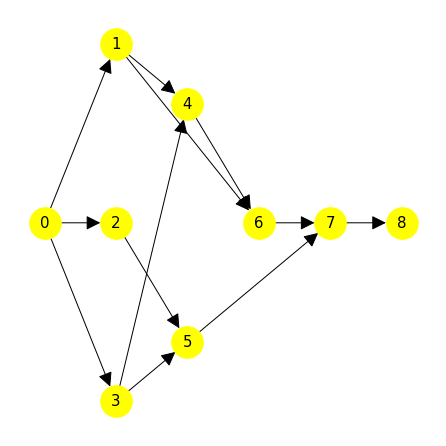

In [7]:
Activity(Act,Time,Prec)

##### 

# The function `CritPath` 
### This computes the critical path, the minimum project completion time, the earliest and  latest starting times and the float for each activity for an activity network `G` with completion times `T`.

In [8]:
def CritPath (G, T):
    global FinInd,e,l,f,In,Out
    In=[[] for i in range(0, FinInd + 1)]
    Out=[[] for i in range(0, FinInd + 1)]
    for arc in G:
        i,j=arc
        In[j] = In[j]  + [i]
        Out[i]  = Out[i] + [j]

    # Forward scan for earliest starting times
    e=[0 for i in range(FinInd + 1)]
    p=[0 for i in range(FinInd + 1)]
    for j in range(1, FinInd + 1):
        #v = In[j][1]
        #e[j] = e[v] + T[v]
        #p[j] = v
        for u in In[j]:
            newe = e[u] + T[u]
            if e[j] <= newe:
                e[j] = newe
                p[j] = u

    # Backward scan for critical path
    cpath = [FinInd]
    start = FinInd
    while (not(start == 0)):
        start = p[start]
        cpath = [start] + cpath

    TTotal = 0
    for j in range(1, FinInd):
        TTotal = TTotal + T[j]
    print("The Total amount of work to be completed is:", TTotal)
    print("The Critical Path is:", cpath)
    print("The Minimum Completion Time with sufficient workers is:", e[FinInd])
    
    # latest starting times
    l=[0 for i in range(FinInd+1)] 
    f=[0 for i in range(FinInd+1)] 
    l[FinInd]=e[FinInd]
    for i in range(FinInd-1, -1, -1):
        l[i]=min([l[j] for j in Out[i]])-T[i]
        f[i]=l[i]-e[i]
    data=[["    Activity", "Earliest", "Latest", "Float"]]
    data=data +[[i,e[i],l[i],f[i]] for i in range(FinInd+1)]
    for row in data:
        print("{: >10}{: >10}{: >10}{: >10}".format(*row))

# Q.1 Example

In [9]:
CritPath(G,T)

The Total amount of work to be completed is: 23
The Critical Path is: [0, 2, 5, 7, 8]
The Minimum Completion Time with sufficient workers is: 11
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         2         2
         2         0         0         0
         3         0         2         2
         4         4         6         2
         5         7         7         0
         6         6         8         2
         7        10        10         0
         8        11        11         0


# The function `CritSchedule` 
### This implements the Critical Path Schedule for an acivity network `G` with times `T` by assigning tasks to `Nw` workers.  The output describes the assignment of activities to each worker together with a graphical display of the history over time.


### This function calls the functions `RankSet1`, which ranks a set of tasks (according to latest starting times) and `GraphSchedule` which produces a graphic for the final schedule

In [10]:
def RankSet1 (vset):
    global l
    vlist=list(vset)
    nlist = len(vlist)
    for i in range(nlist):
        for j in range(i,nlist):
                vi = vlist[i];  vj = vlist[j]
                ri = l[vi]; rj = l[vj]
                if rj < ri or (ri == rj and vj < vi):
                    vlist[i],vlist[j]=vlist[j],vlist[i]
    return(vlist)

In [11]:
def GraphSchedule (Wseq,Time):
    Nw=len(Wseq)
    colorw={1:"green",2:"yellow",3:"orange",4:"blue",5:"red"}
    fig = plt.figure()
    ax = fig.add_subplot() 
    Tmax=0
    for nw in range(1,Nw+1):
        Wseqn=Wseq[nw]
        AW=int(len(Wseqn)/4) # no of tasks for a worker
        y0=nw-1
        for iw in range(AW):
            t0,Aiw,t1=Wseqn[0+4*iw:3+4*iw]
            x0=t0
            width=t1-t0
            Tmax=max(Tmax,t1)
            rect = Rectangle((x0, y0), width, 1, ec ='black',lw = 2,color=colorw[nw]) 
            ax.add_patch(rect) 
            ax.text(x0+width/2, y0+1/2, Aiw,size=15)
        ax.text(-Time/3, y0+1/2, "Worker "+str(nw),size=15)
    
    # tickmarks and axes range and labels
    ax.set_xticks([k for k in range(Time+1)])
    ax.set_yticks([])
    plt.xlim([0, Time]) 
    plt.ylim([0, Nw])
    plt.xlabel('Time',size=15)
    plt.show()

In [12]:
def CritSchedule (G, T, Nw):
#
# This function finds the optimal schedule according to the critical path scheduling algorithm for Nw workers. 
# Any idle worker is always assigned an activity if possible.
#
    global FinInd,In,Out,e,workertaskseq
    CritPath(G, T)
    print("")
# Total time for all activities
    Tot = 0
    for k in range(1, FinInd):
        Tot = Tot + T[k]
    Topt = max(Tot / Nw, e[FinInd])
# sequences of tasks undertaken by worker i
    workertaskseq=dict()
    for i in range(1, Nw + 1):
        workertaskseq[i] = []
#set of workers available
    availset = set([k for k in range(1,Nw+1)])
#worker assigned to activity k
    Activity=dict()
#
# Initial activities Done, Current and Next
#
    Current = set(); Done = set(); Next = set(Out[0]); Time = 0
#
# The Time left for activities
#
    Tleft=dict()
    for i in range(0, FinInd + 1):
        Tleft[i] = T[i]

    while (len(Done) != FinInd-1):
#
# Assign activities to available workers:
#
        Nextlist = RankSet1(set(Next))
        noc = len(Current)
        for i in range(1, min(Nw - noc, len(Next)) + 1):
            nextjob = Nextlist[i-1]
            workeri = list(availset)[0]
            Activity[nextjob] = workeri
            availset = availset - set([workeri])
            workertaskseq[workeri] = workertaskseq[workeri] + [Time, nextjob]
            Current = Current | set([nextjob])
            Next = Next - set([nextjob])
        print("Time=",Time,"Current activities=",Current)
        print("")
 # times to complete current tasks
        Tset = set()
        for v in Current:
            Tset = Tset | set([Tleft[v]])
        DelT = min(tuple(Tset))
        Time = Time + DelT
        for v in Current:
            Tleft[v] = Tleft[v] - DelT
            if Tleft[v] == 0:
                print("Time=",Time,"Activity",v,"completed")
                workerv = Activity[v]
                workertaskseq[workerv] = workertaskseq[workerv] +[Time, v]
                availset = availset | set([workerv])
                Done = Done | set([v])
                Current = Current - set([v])
                for w in Out[v]:
                    if set(In[w]) - Done == set():
                        Next = Next | set([w]) - set([FinInd])
    if Time == Topt:
        print("")
        print("Optimal Schedule Found for",Nw,"Workers!")
        if Topt == e[FinInd]:
            print("The Minimal Completion Time of",e[FinInd], "is achieved for",Nw," Workers!")
    GraphSchedule(workertaskseq,Time)

# Q.1 example
### Find Critical Schedule for first example in class for 1,2,3 workers

The Total amount of work to be completed is: 23
The Critical Path is: [0, 2, 5, 7, 8]
The Minimum Completion Time with sufficient workers is: 11
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         2         2
         2         0         0         0
         3         0         2         2
         4         4         6         2
         5         7         7         0
         6         6         8         2
         7        10        10         0
         8        11        11         0

Time= 0 Current activities= {1, 2}

Time= 4 Activity 1 completed
Time= 4 Current activities= {2, 3}

Time= 7 Activity 2 completed
Time= 7 Current activities= {3}

Time= 8 Activity 3 completed
Time= 8 Current activities= {4, 5}

Time= 10 Activity 4 completed
Time= 10 Current activities= {5, 6}

Time= 11 Activity 5 completed
Time= 11 Current activities= {6}

Time= 12 Activity 6 completed
Time= 12 Current activities= {7}

Time= 13 Activity 7

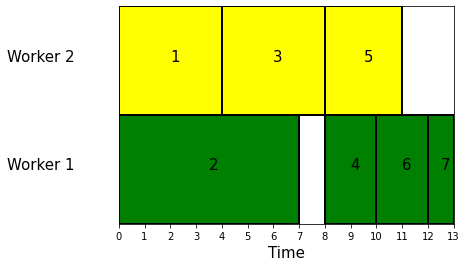

In [13]:
CritSchedule(G,T,2)

The Total amount of work to be completed is: 23
The Critical Path is: [0, 2, 5, 7, 8]
The Minimum Completion Time with sufficient workers is: 11
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         2         2
         2         0         0         0
         3         0         2         2
         4         4         6         2
         5         7         7         0
         6         6         8         2
         7        10        10         0
         8        11        11         0

Time= 0 Current activities= {1, 2, 3}

Time= 4 Activity 1 completed
Time= 4 Activity 3 completed
Time= 4 Current activities= {2, 4}

Time= 6 Activity 4 completed
Time= 6 Current activities= {2, 6}

Time= 7 Activity 2 completed
Time= 7 Current activities= {5, 6}

Time= 8 Activity 6 completed
Time= 8 Current activities= {5}

Time= 10 Activity 5 completed
Time= 10 Current activities= {7}

Time= 11 Activity 7 completed

Optimal Schedule Found

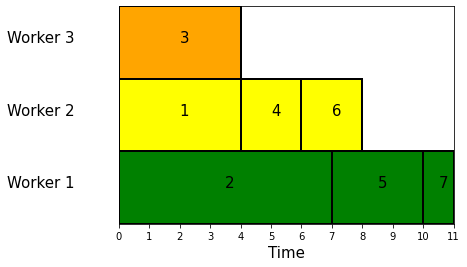

In [19]:
CritSchedule(G,T,3)

The Total amount of work to be completed is: 23
The Critical Path is: [0, 2, 5, 7, 8]
The Minimum Completion Time with sufficient workers is: 11
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         2         2
         2         0         0         0
         3         0         2         2
         4         4         6         2
         5         7         7         0
         6         6         8         2
         7        10        10         0
         8        11        11         0

Time= 0 Current activities= {1, 2, 3}

Time= 4 Activity 1 completed
Time= 4 Activity 3 completed
Time= 4 Current activities= {2, 4}

Time= 6 Activity 4 completed
Time= 6 Current activities= {2, 6}

Time= 7 Activity 2 completed
Time= 7 Current activities= {5, 6}

Time= 8 Activity 6 completed
Time= 8 Current activities= {5}

Time= 10 Activity 5 completed
Time= 10 Current activities= {7}

Time= 11 Activity 7 completed

Optimal Schedule Found

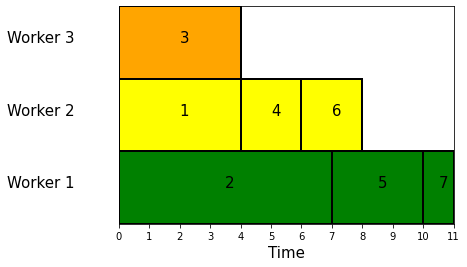

In [15]:
CritSchedule(G,T,3)

# The function `ProtSchedule`  
### This implements the Protection Scheme Schedule for assigning tasks to `Nw` workers. The output describes the assignement of activities to each worker together with a graphical display of the history over time. 

### This function calls RankSet2 which ranks  a set of tasks according to earliest + lastest starting times

In [16]:
def RankSet2 (vset):
    global l,e
    vlist=list(vset)
    nlist = len(vlist)
    for i in range(nlist):
        for j in range(i,nlist):
                vi = vlist[i];  vj = vlist[j]
                ri = e[vi]+l[vi]; rj =e[vj]+ l[vj]
                if rj < ri or (ri == rj and vj < vi):
                    vlist[i],vlist[j]=vlist[j],vlist[i]
    return(vlist)

In [17]:
def ProtSchedule (G, T, Nw):
#
# This function finds the optimal schedule according to the critical path scheduling algorithm for Nw workers. 
# Any idle worker is always assigned an activity if possible.
#
    global FinInd,In,Out,e,workertaskseq
    CritPath(G, T)
    print("")
# Total time for all activities
    Tot = 0
    for k in range(1, FinInd):
        Tot = Tot + T[k]
    Topt = max(Tot / Nw, e[FinInd])
# sequences of tasks undertaken by worker i
    workertaskseq=dict()
    for i in range(1, Nw + 1):
        workertaskseq[i] = []
#set of workers available
    availset = set([k for k in range(1,Nw+1)])
#worker assigned to activity k
    Activity=dict()
#
# Initial activities Done, Current and Next
#
    Current = set(); Done = set(); Next = set(Out[0]); Time = 0
#
# The Time left for activities
#
    Tleft=dict()
    for i in range(0, FinInd + 1):
        Tleft[i] = T[i]
    AllRank=RankSet2(set([i for i in range(1,FinInd+1)]));
    while (len(Done) != FinInd-1):
#
# Assign activities to available workers:
#
        Nextlist = RankSet2(set(Next))
        noc = len(Current)
        for i in range(1, min(Nw - noc, len(Next)) + 1):
            nextjob = Nextlist[i-1]
            workeri = list(availset)[0]
            if nextjob==AllRank[0]: 
                Activity[nextjob] = workeri
                availset = availset - set([workeri])
                workertaskseq[workeri] = workertaskseq[workeri] + [Time, nextjob]
                Current = Current | set([nextjob])
                Next = Next - set([nextjob])
                AllRank=RankSet2(set(AllRank) - set([nextjob]))
        print("Time=",Time,"Current activities=",Current)
        print("")
 # times to complete current tasks
        Tset = set()
        for v in Current:
            Tset = Tset | set([Tleft[v]])
        DelT = min(tuple(Tset))
        Time = Time + DelT
        for v in Current:
            Tleft[v] = Tleft[v] - DelT
            if Tleft[v] == 0:
                print("Time=",Time,"Activity",v,"completed")
                workerv = Activity[v]
                workertaskseq[workerv] = workertaskseq[workerv] +[Time, v]
                availset = availset | set([workerv])
                Done = Done | set([v])
                Current = Current - set([v])
                for w in Out[v]:
                    if set(In[w]) - Done == set():
                        Next = Next | set([w]) - set([FinInd])
    if Time == Topt:
        print("")
        print("Optimal Schedule Found for",Nw,"Workers!")
        if Topt == e[FinInd]:
            print("The Minimal Completion Time of",e[FinInd], "is achieved for",Nw," Workers!")
    GraphSchedule(workertaskseq,Time)

# Q.1  Example 
### Find the Protected Schedule for first example in class for 2,3 workers

The Total amount of work to be completed is: 23
The Critical Path is: [0, 2, 5, 7, 8]
The Minimum Completion Time with sufficient workers is: 11
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         2         2
         2         0         0         0
         3         0         2         2
         4         4         6         2
         5         7         7         0
         6         6         8         2
         7        10        10         0
         8        11        11         0

Time= 0 Current activities= {1, 2}

Time= 4 Activity 1 completed
Time= 4 Current activities= {2, 3}

Time= 7 Activity 2 completed
Time= 7 Current activities= {3}

Time= 8 Activity 3 completed
Time= 8 Current activities= {4, 5}

Time= 10 Activity 4 completed
Time= 10 Current activities= {5, 6}

Time= 11 Activity 5 completed
Time= 11 Current activities= {6}

Time= 12 Activity 6 completed
Time= 12 Current activities= {7}

Time= 13 Activity 7

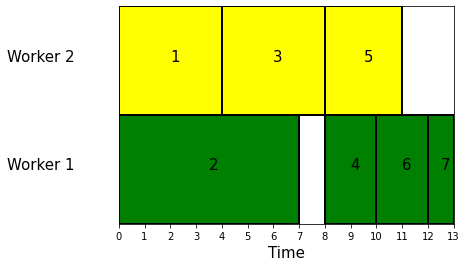

In [18]:
ProtSchedule (G, T, 2)

# Q.2 (*)
## Find the critical path and the minimal completion time for the following assembly problem with 10 activities ($A-J$):

### $A$ precedes activity $J$ and the completion time is 7.
### $B$ precedes activity $J$ and the completion time is 7.
### $C$ precedes activity $J$ and the completion time is 7.
### $D$ precedes activities $C$, $E$, $F$ and $J$ and the completion time is 2.
### $E$ precedes activities $C$, $H$, $I$ and $J$ and the completion time is 3. 
### $F$ precedes activities $G$, $H$ and $I$ and the completion time is 2.
### $G$ precedes activities $H$ and $I$ and the completion time is 2.
### $H$ precedes Finish and the completion time is 8.
### $I$ precedes Finish and the completion time is 8.
### $J$ precedes Finish and the completion time is 18.

# Q.3 (*) Example from lecture 8
###  Investigate the scheduling of 2 or 3 workers to the example discussed in class using the critical path and protection scheduling using the Python functions {\tt CritSchedule(G,T,Nw)}and {\tt ProtSchedule(G,T,Nw)}.
![Network](Lab3.jpg)
### 	With the earliest and latest starting times found verify the scheduling	found by hand.

# Q.4  Computer Program Example
### A large computer program consists of a number of modules (or subroutines) $M_{1},M_{2},M_{3},$ $M_{4},M_{5}$, $M_{6},M_{7}$ and $M_{8}$.
	
### Each module $M_{i}$ takes a time $T_{i}$ (in minutes) to complete and their completion depend of some preceding modules as follows:
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\text{Module} & M_{1} & M_{2} & M_{3} & M_{4} & M_{5} & M_{6} & M_{7} & M_{8} 
\\ 
\hline
T_{i} & 2 & 2 & 3 & 2 & 2 & 6 & 3 & 4 
\\ 
\hline
\text{Preceding} & \text{none} & \text{none} & M_{1} & M_{1},M_{2} & M_{1},M_{2} & M_{3},M_{4},M_{5} & M_{3},M_{4},M_{5} & M_{3},M_{7} 
\\ 
\hline
\end{array}

## (a) Construct the activity network for this system with standard labeling.

## (b) Find the critical path minimal completion time assuming that a sufficient number of parallel processors are available. 
## What are the earliest and latest starting times for each module?

## (c) Find the minimal completion time assuming that only two parallel processors are available using the critical path or protection	scheme scheduling strategies. 
## What is the average computing time per processor?

## (d) A programmer realizes that part of either module $M_{3}$ or $M_{4}$ can placed in module $M_{6}$ at a saving of 1 minute in	for $T_{3}$ or $T_{4}$ but at the expense of 1 minute further in $T_{6}$. 
## What would you recommend for maximum efficiency given that you have only two parallel processors?